# Heart Disease Prediction

### Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# A. Eksplorasi Kolom Dataset

Pada bagian ini kita akan memahami kolom pada dataset

### Load dataset

In [2]:
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Cek Jumlah Kolom dan Baris

In [3]:
df.shape

(1025, 14)

Ada 1025 baris dan 14 kolom pada dataset

### Cek Nama Atribut

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Berikut adalah detail kolom berdasarkan kamus data
1. Age
2. Sex (1 = male, 0 = female)
3. Chest-pain type (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic
4. Resting Blood Pressure
5. Serum Cholestrol
6. Fasting Blood Sugar (0 = False, 1 = True)
7. Resting ECG (0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy)
8. Max heart rate achieved
9. Exercise induced angina (0 = No, 1 = Yes)
10. ST depression
11. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
11. Number of major vessels (0–3) colored by flourosopy
12. Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
13. Target (1 = Disease, 0 = Non Disease

### Cek Info Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Pada beberapa kolom, tipe datanya tidak sesuai dengan data sebenarnya, yang seharusnya categorical masih tertulis numerical. Perbedaan ini akan diperbaiki pada section data preparation

### Cek Deskripsi Statistik

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Cek Jumlah Class

In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

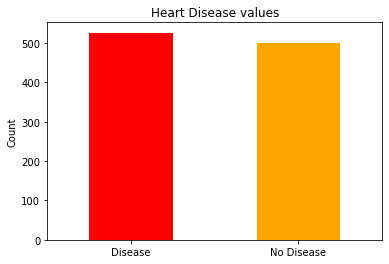

In [8]:
fig = df.target.value_counts().plot(kind = 'bar', color=['red', 'orange'])
fig.set_xticklabels(labels=['Disease', "No Disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Count");

Kelas pada dataset cukup seimbang. Terdapat 526 data orang yang memiliki penyakit jantung, dan 499 data orang yang tidak memiliki penyakit jantung

# B. Data Preparation

Pada bagian ini, data akan dipersiapkan untuk dianalisis

### Cek Missing Value

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data tidak memiliki missing values

### Mengubah tipe data 

In [10]:
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df[lst] = df[lst].astype(object)

In [11]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

### Mengubah nama values

In [12]:
df['sex'] = df['sex'].replace([0, 1], ['Female', 'Male'])
df['cp'] = df['cp'].replace([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptotic'])
df['fbs'] = df['fbs'].replace([0, 1], ['False', 'True'])
df['restecg'] = df['restecg'].replace([0, 1, 2], ['Normal', 'Having ST-T Wave Abnormality', 'Left Ventricular Hyperthrophy'])
df['exang'] = df['exang'].replace([0, 1], ['No', 'Yes'])
df['slope'] = df['slope'].replace([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
df['thal'] = df['thal'].replace([1, 2, 3], ['Normal', 'Fixed Defect', 'Reversable Defect'])
df['target'] = df['target'].replace([0, 1], ['No Disease', 'Disease'])

In [13]:
df['target'].value_counts()

Disease       526
No Disease    499
Name: target, dtype: int64

### Mengubah nama kolom

In [14]:
df.columns = ['age', 'sex', 'chest-pain type', 'resting blood pressure', 'serum cholestrol', 'fasting blood sugar', 'resting ECG', 'maxheartrate', 'exercise induced angina', 'ST depression', 'peak exercise ST segment', 'number of major vessels', 'thalassemia', 'diagnosis']
df.head()

,age,sex,chest-pain type,resting blood pressure,serum cholestrol,fasting blood sugar,resting ECG,maxheartrate,exercise induced angina,ST depression,peak exercise ST segment,number of major vessels,thalassemia,diagnosis
0,52,Male,Typical Angina,125,212,False,Having ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversable Defect,No Disease
1,53,Male,Typical Angina,140,203,True,Normal,155,Yes,3.1,Upsloping,0,Reversable Defect,No Disease
2,70,Male,Typical Angina,145,174,False,Having ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversable Defect,No Disease
3,61,Male,Typical Angina,148,203,False,Having ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversable Defect,No Disease
4,62,Female,Typical Angina,138,294,True,Having ST-T Wave Abnormality,106,No,1.9,Flat,3,Fixed Defect,No Disease


# C. Exploratory Data Analysis

In [15]:
# pisahkan feature kategorikal dan numerikal
numerical_col = df.select_dtypes(exclude=np.object_)
categorical_col = df.select_dtypes(exclude=np.number)

## Analisis Univariat

### 1. Fitur Numerik

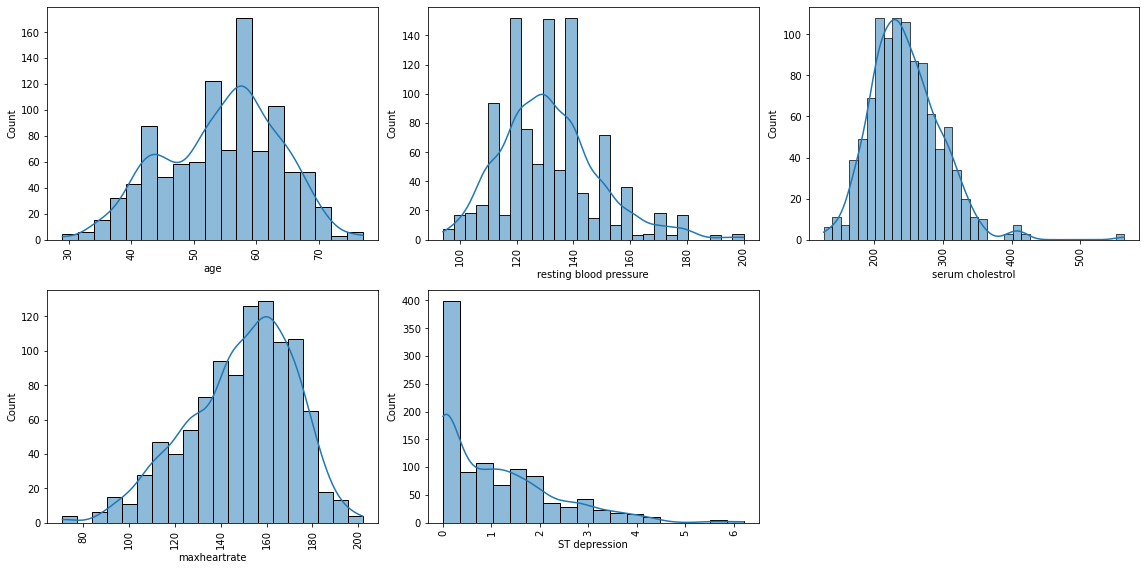

In [16]:
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

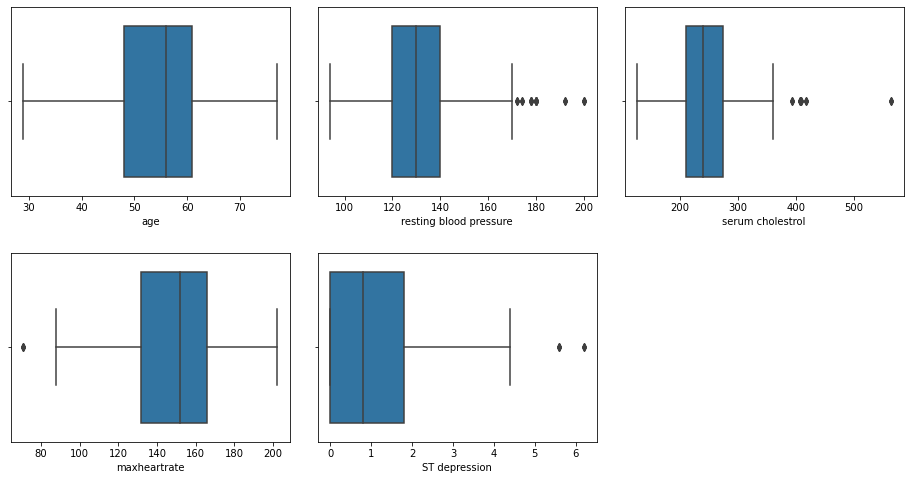

In [17]:
plt.figure(figsize=(16, 8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.boxplot(data=numerical_col,x=column)
    plt.subplots_adjust(wspace=0.1, hspace=0.3)


### 2. Fitur Kategorik

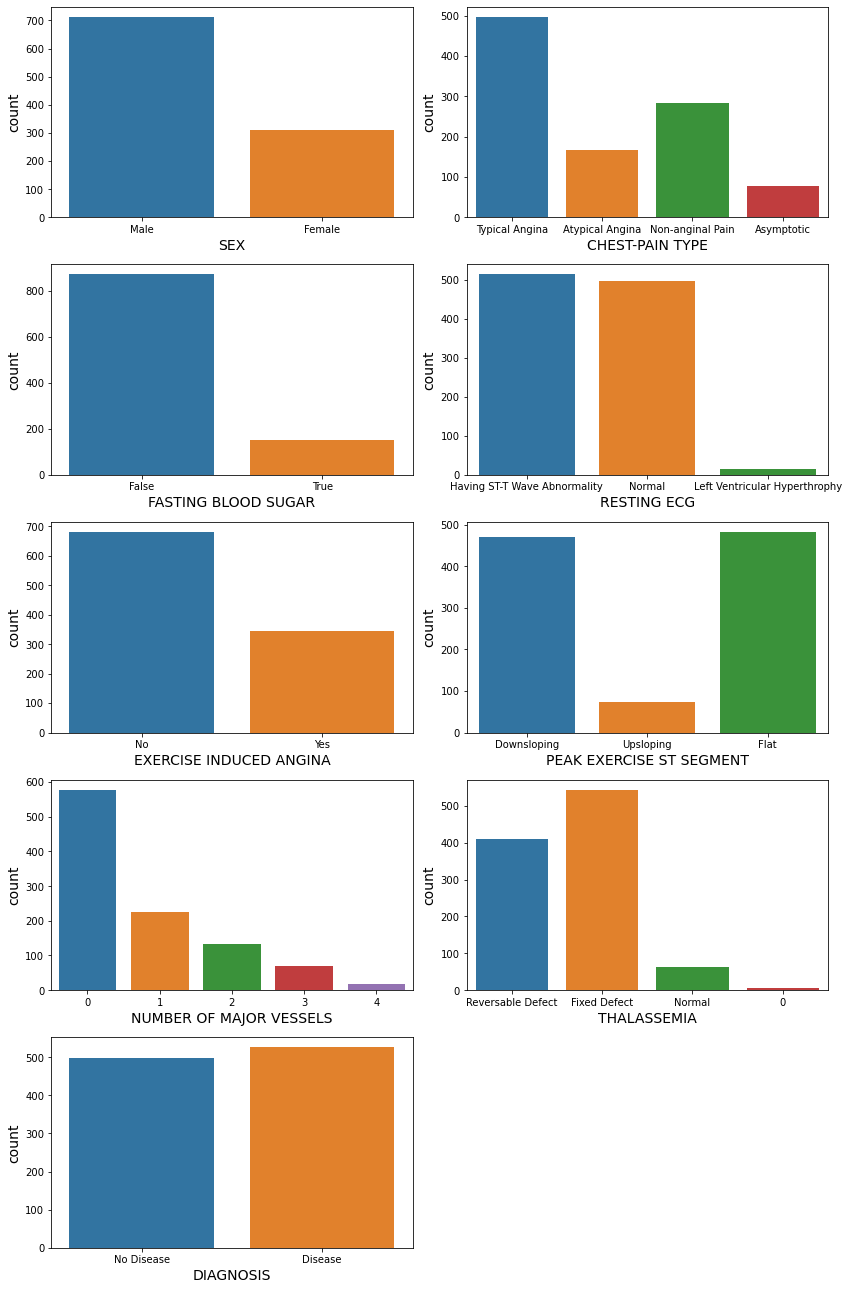

In [18]:
plt.figure(figsize=(12,18))
for index,column in enumerate(categorical_col):
    plt.subplot(5,2,index+1)
    sns.countplot(data=categorical_col,x=column)
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

## Analisis Bivariat

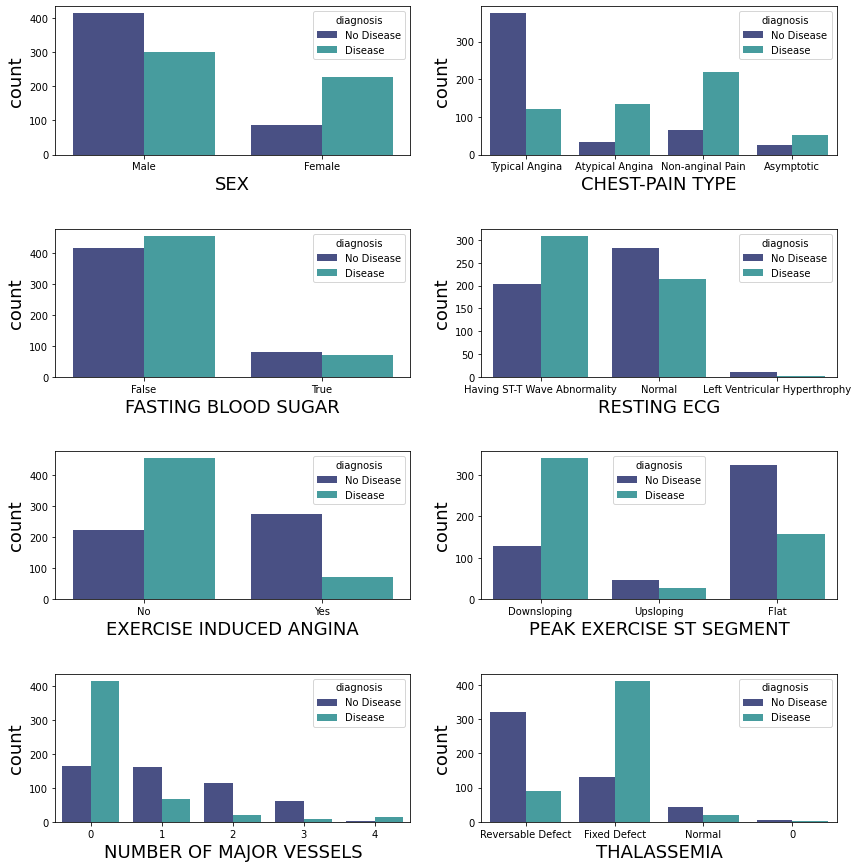

In [19]:
Cat_col=categorical_col.columns
fig = plt.figure(figsize=(14,15))
for index in range(len(Cat_col)):
    if Cat_col[index] != 'diagnosis':
        plt.subplot(4,2,index + 1)
        sns.countplot(data = categorical_col,x=Cat_col[index],hue=df['diagnosis'], palette ="mako")
        plt.xlabel(Cat_col[index].upper(),fontsize=18)
        plt.ylabel("count", fontsize=18)
        plt.subplots_adjust(wspace = 0.2, hspace= 0.5)

Berdasarkan data di atas, yang memiliki kecenderungan untuk terkena penyakit jantung adalah 
1. Perempuan
2. Chest pain tipe Asymptotic
3. Resting ECG Having ST-T Wave Abnormality
4. Exercise Induced Angina No
5. Peak Exercise ST Segment Downsloping
6. Number of Major Vessels 0
7. Thalassemia Fixed Defect

Sedangkan Fasting Blood Sugar tidak memiliki perbedaan yang seignifikan untuk terkena masalah jantung

## Analisis Multivariat

<AxesSubplot:>

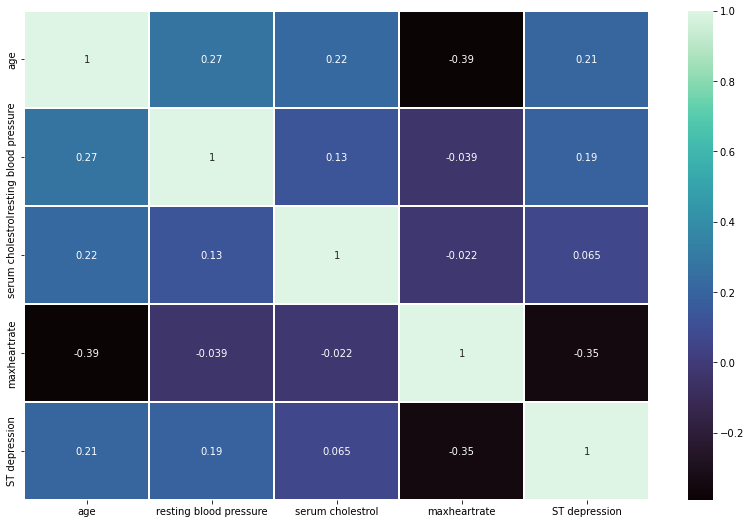

In [20]:
plt.figure(figsize=(14, 9))
sns.heatmap(numerical_col.corr(), annot=True,cmap='mako', linewidths=0.1)

Masing-masing variabel numerik memiliki hubungan yang lemah dengan variabel numerik lain sehingga dapat disimpulkan tidak ada multicollinearity pada data ini

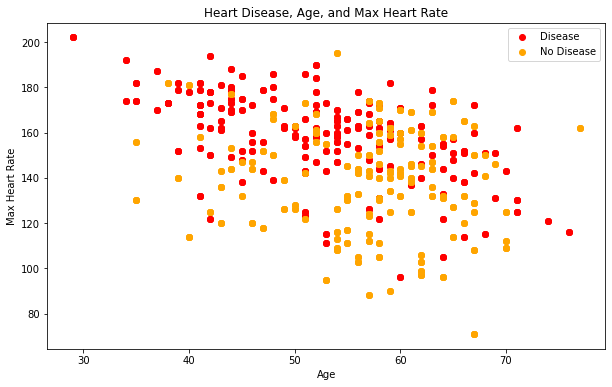

In [21]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting value orang yang punya penyakit jantung
plt.scatter(df.age[df.diagnosis=='Disease'], 
            df.maxheartrate[df.diagnosis=='Disease'], 
            c="red")

#plotting value orang yang tidak memiliki penyakit jantung
plt.scatter(df.age[df.diagnosis=='No Disease'], 
            df.maxheartrate[df.diagnosis=='No Disease'], 
            c="orange")

# Addind info
plt.title("Heart Disease, Age, and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Berdasarkan umur, pasien dengan atau tanpa gangguan jantung rata-rata berada di rentang umur 50-70 tahun. Pasien dengan gangguan jantung biasanya memiliki detak jantung yang tinggi dibandingkan pasien yang tidak memiliki masalah jantung

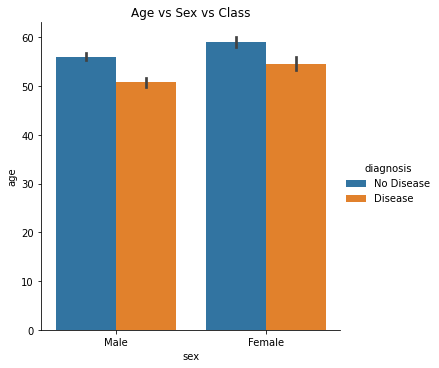

In [22]:
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'diagnosis')
plt.title('Age vs Sex vs Class')
plt.show()

Perempuan cenderung menderita masalah jantung ketika usianya lebih tua dari laki-laki

# D. Data Pre-Processing

### Train Test Split

Kolom diagnosis adalah kolom dependent yang menjadi target dari prediksi sehingga perlu dipisahkan dari variabel independent.

Dataset akan dipisah menjadi 80% data training dan 20% data testing

In [23]:
df_train = df
X = df_train.drop(columns = 'diagnosis')
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Penerapan Standardisasi dan One-Hot Encode

Standardisasi:
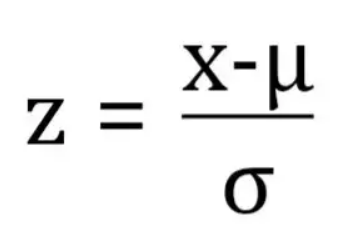
𝑥: nilai data <br>
𝜇: nilai rata − rata <br>
𝜎: standar deviasi <br>

Melakukan standardisasi setelah train test split berguna agar mean dan standar deviasi yang digunakan untuk normalisasi data training akan berdasar penuh kepada subset training, sehingga tidak ada informasi dari data test yang masuk ke data training

### Data train

In [24]:
#separate the numeric and categoric column
numeric_train = x_train.select_dtypes(exclude=np.object_)
categoric_train = x_train.select_dtypes(exclude=np.number)

In [25]:
#standardization for numeric (train)
numeric_train = (numeric_train - numeric_train.mean()) / numeric_train.std()
numeric_train

,age,resting blood pressure,serum cholestrol,maxheartrate,ST depression
835,-0.585483,-0.778978,-1.933851,-1.018473,-0.210533
137,1.050836,2.740059,1.609652,0.202758,-0.911596
534,-0.040043,-1.346565,0.441907,0.769759,-0.911596
495,0.505396,0.185919,-0.222500,0.508066,-0.473431
244,-0.367307,-0.381667,-0.001031,0.726143,1.191594
...,...,...,...,...,...
700,-1.458186,-0.097874,-0.625171,0.813374,0.841062
71,0.723572,0.469713,-0.766106,-0.495088,0.753429
106,-0.367307,0.469713,1.086180,1.031451,0.490531
270,-1.240010,-1.233048,-0.685571,0.508066,-0.911596


In [26]:
#one-hot encoding for categoric (train)
categoric_train = pd.get_dummies(categoric_train)
categoric_train

,sex_Female,sex_Male,chest-pain type_Asymptotic,chest-pain type_Atypical Angina,chest-pain type_Non-anginal Pain,chest-pain type_Typical Angina,fasting blood sugar_False,fasting blood sugar_True,resting ECG_Having ST-T Wave Abnormality,resting ECG_Left Ventricular Hyperthrophy,...,peak exercise ST segment_Upsloping,number of major vessels_0,number of major vessels_1,number of major vessels_2,number of major vessels_3,number of major vessels_4,thalassemia_0,thalassemia_Fixed Defect,thalassemia_Normal,thalassemia_Reversable Defect
835,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
137,1,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
534,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
495,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
244,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
71,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
106,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
270,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


### Standardisasi untuk data test

In [27]:
#separate the numeric and categoric column
numeric_test = x_test.select_dtypes(exclude=np.object_)
categoric_test = x_test.select_dtypes(exclude=np.number)

In [28]:
#standardization for numeric (test)
numeric_test = (numeric_test - numeric_test.mean()) / numeric_test.std()
numeric_test

,age,resting blood pressure,serum cholestrol,maxheartrate,ST depression
527,0.838798,-0.417826,-0.695655,0.635355,-0.922261
359,-0.195682,-0.184435,-0.576289,-1.420513,-0.922261
447,0.034202,1.682688,0.668538,-0.135595,-0.305666
31,-0.540509,-0.651216,-0.098821,0.592525,-0.074443
621,-0.770393,-0.067740,0.105808,0.078558,-0.922261
...,...,...,...,...,...
832,1.528451,-0.767911,0.463909,0.121388,-0.151517
796,-1.574988,0.223998,-0.797970,-0.692393,-0.922261
644,-1.230162,-0.651216,-0.405764,0.892339,-0.922261
404,0.723856,0.515736,-0.729760,-0.435410,0.542153


In [29]:
#one-hot encoding for categoric (test)
categoric_test = pd.get_dummies(categoric_test)
categoric_test

,sex_Female,sex_Male,chest-pain type_Asymptotic,chest-pain type_Atypical Angina,chest-pain type_Non-anginal Pain,chest-pain type_Typical Angina,fasting blood sugar_False,fasting blood sugar_True,resting ECG_Having ST-T Wave Abnormality,resting ECG_Left Ventricular Hyperthrophy,...,peak exercise ST segment_Upsloping,number of major vessels_0,number of major vessels_1,number of major vessels_2,number of major vessels_3,number of major vessels_4,thalassemia_0,thalassemia_Fixed Defect,thalassemia_Normal,thalassemia_Reversable Defect
527,1,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
359,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
447,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
621,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
796,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
644,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
404,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
features_train = pd.concat([numeric_train , categoric_train ], axis=1)
features_train 

,age,resting blood pressure,serum cholestrol,maxheartrate,ST depression,sex_Female,sex_Male,chest-pain type_Asymptotic,chest-pain type_Atypical Angina,chest-pain type_Non-anginal Pain,...,peak exercise ST segment_Upsloping,number of major vessels_0,number of major vessels_1,number of major vessels_2,number of major vessels_3,number of major vessels_4,thalassemia_0,thalassemia_Fixed Defect,thalassemia_Normal,thalassemia_Reversable Defect
835,-0.585483,-0.778978,-1.933851,-1.018473,-0.210533,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
137,1.050836,2.740059,1.609652,0.202758,-0.911596,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
534,-0.040043,-1.346565,0.441907,0.769759,-0.911596,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
495,0.505396,0.185919,-0.222500,0.508066,-0.473431,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
244,-0.367307,-0.381667,-0.001031,0.726143,1.191594,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.458186,-0.097874,-0.625171,0.813374,0.841062,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
71,0.723572,0.469713,-0.766106,-0.495088,0.753429,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
106,-0.367307,0.469713,1.086180,1.031451,0.490531,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
270,-1.240010,-1.233048,-0.685571,0.508066,-0.911596,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [31]:
features_test = pd.concat([numeric_test, categoric_test], axis=1)
features_test

,age,resting blood pressure,serum cholestrol,maxheartrate,ST depression,sex_Female,sex_Male,chest-pain type_Asymptotic,chest-pain type_Atypical Angina,chest-pain type_Non-anginal Pain,...,peak exercise ST segment_Upsloping,number of major vessels_0,number of major vessels_1,number of major vessels_2,number of major vessels_3,number of major vessels_4,thalassemia_0,thalassemia_Fixed Defect,thalassemia_Normal,thalassemia_Reversable Defect
527,0.838798,-0.417826,-0.695655,0.635355,-0.922261,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
359,-0.195682,-0.184435,-0.576289,-1.420513,-0.922261,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
447,0.034202,1.682688,0.668538,-0.135595,-0.305666,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31,-0.540509,-0.651216,-0.098821,0.592525,-0.074443,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
621,-0.770393,-0.067740,0.105808,0.078558,-0.922261,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1.528451,-0.767911,0.463909,0.121388,-0.151517,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
796,-1.574988,0.223998,-0.797970,-0.692393,-0.922261,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
644,-1.230162,-0.651216,-0.405764,0.892339,-0.922261,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
404,0.723856,0.515736,-0.729760,-0.435410,0.542153,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# E. Modelling

### 1. Logistic Regression

Logistic regression adalah metode statistika yang digunakan untuk memprediksi outcome dari independent variable berdasarkan observasi sebelumnya. Logistik regression biasanya digunakan dalam klasifikasi biner.

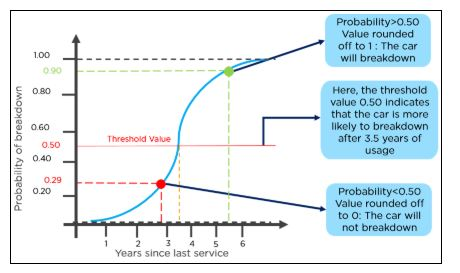

In [32]:
log_model = LogisticRegression().fit(features_train, y_train)

In [33]:
# Classifiaction report untuk training model
y_train_pred = log_model.predict(features_train)
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train,y_train_pred))

# Classifiaction report untuk testing model
y_test_pred = log_model.predict(features_test)
print('\nClassification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

     Disease       0.86      0.92      0.89       423
  No Disease       0.91      0.85      0.87       397

    accuracy                           0.88       820
   macro avg       0.88      0.88      0.88       820
weighted avg       0.88      0.88      0.88       820


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

     Disease       0.78      0.91      0.84       103
  No Disease       0.89      0.75      0.81       102

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



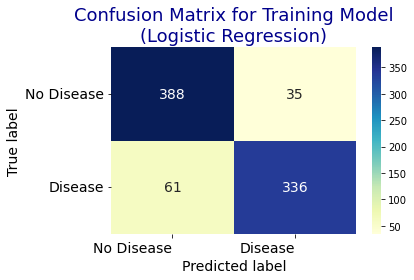

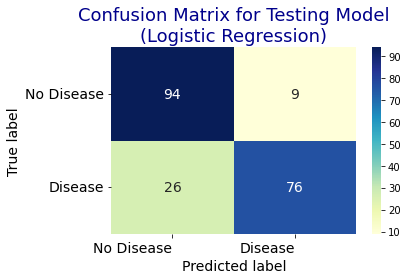

In [34]:
# Confusion Matrix for Data Training
y_train_pred = log_model.predict(features_train)
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Disease','Disease'), ('No Disease','Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

y_test_pred = log_model.predict(features_test)
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Disease','Disease'), ('No Disease','Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### 2. Random Forest

Random Forest adalah model yang bekerja dengan membangun beberapa decision tree dan menggabungkannya demi mendapatkan prediksi yang lebih stabil dan akurat.
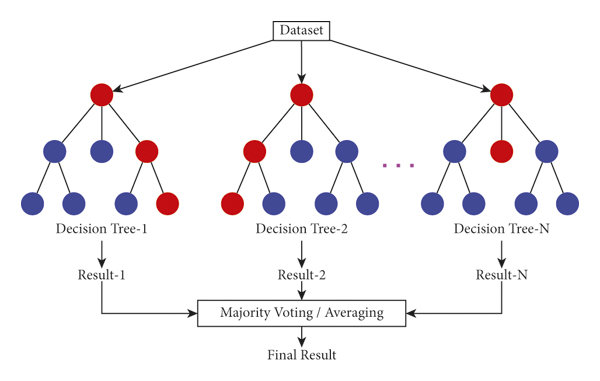
Cara kerja algoritma random forest:
1. Algoritma memilih sampel acak dari dataset yang disediakan.
2. Membuat decision tree untuk setiap sampel yang dipilih. Kemudian akan didapatkan hasil prediksi dari setiap decision tree yang telah dibuat.
3. Dilakukan proses voting untuk setiap hasil prediksi. Untuk masalah klasifikasi menggunakan modus (nilai yg paling sering muncul), sedangkan untuk masalah regresi akan menggunakan mean (nilai rata-rata).
4. Algoritma akan memilih hasil prediksi yang paling banyak dipilih (vote terbanyak) sebagai prediksi akhir.

In [35]:
rdf_model = RandomForestClassifier().fit(features_train, y_train)

# Classifiaction report untuk training model
y_train_pred = rdf_model.predict(features_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

# Classifiaction report untuk training model
y_test_pred = rdf_model.predict(features_test)
print('\nClassification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

     Disease       1.00      1.00      1.00       423
  No Disease       1.00      1.00      1.00       397

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

     Disease       1.00      0.97      0.99       103
  No Disease       0.97      1.00      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



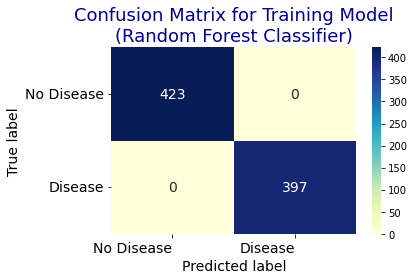

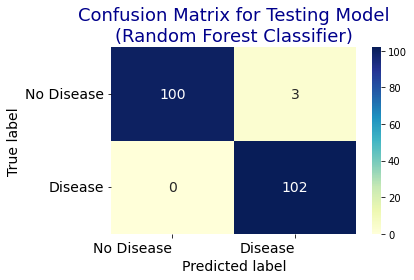

In [36]:
# Confusion Matrix untuk Training Model
y_train_pred = rdf_model.predict(features_train)
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Disease','Disease'), ('No Disease','Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Confusion Matrix untuk Testing Model
y_test_pred = rdf_model.predict(features_test)
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Disease','Disease'), ('No Disease','Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# F. Kesimpulan

- Algoritma Random Forest Classifier dapat memprediksi lebih baik dan tidak overfit maupun underfit. Hal ini karena akurasi pada data training dan data testingnya cenderung sama. 
- Berdasarkan confusion matrix, model dapat memprediksi dengan benar dari segi true positive dan true negative. Walaupun pada data testing terdapat 3 false negative, namun ini bukan masalah besar karena ketika pasien yang tidak memiliki penyakit diprediksi memiliki penyakit, hal ini tidak membahayakan nyawa pasien.
- Hasil prediksi ini tidak dapat dijadikan acuan dalam memprediksi penyakit jantung, sehingga dibutuhkan konsultasi lebih lanjut dengan tenaga medis.